In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
df = pd.read_csv('auto_clean.csv')
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [4]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [6]:
df = df.dropna()
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [7]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'eight'], dtype=object)

In [8]:
num_columns = df.select_dtypes(include=np.number).columns

In [9]:
cat_columns = []
for col in df.columns:
    if col not in num_columns:
        cat_columns.append(col)
cat_columns

['make',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 'horsepower-binned']

In [10]:
for cc in cat_columns:
    df[cc] = pd.Categorical(df[cc])
    df[cc] = df[cc].cat.codes

C:\Users\rashi\AppData\Local\Temp\ipykernel_26260\649880246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cc] = pd.Categorical(df[cc])
C:\Users\rashi\AppData\Local\Temp\ipykernel_26260\649880246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cc] = df[cc].cat.codes


In [11]:
train, test = train_test_split(df, test_size=0.2, random_state=2)
train, val = train_test_split(train, test_size=0.2, random_state=23)

In [12]:
train_stats = train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
symboling,124.0,0.701613,1.249259,-2.000000,0.000000,1.000000,1.250000,3.000000
normalized-losses,124.0,120.766129,32.752114,65.000000,95.000000,121.500000,130.250000,256.000000
make,124.0,12.564516,6.109092,0.000000,8.000000,12.000000,19.000000,21.000000
aspiration,124.0,0.177419,0.383573,0.000000,0.000000,0.000000,0.000000,1.000000
num-of-doors,124.0,0.403226,0.492535,0.000000,0.000000,0.000000,1.000000,1.000000
body-style,124.0,2.653226,0.855820,0.000000,2.000000,3.000000,3.000000,4.000000
drive-wheels,124.0,1.322581,0.578031,0.000000,1.000000,1.000000,2.000000,2.000000
engine-location,124.0,0.008065,0.089803,0.000000,0.000000,0.000000,0.000000,1.000000
wheel-base,124.0,99.011290,6.368102,86.600000,94.500000,96.950000,102.750000,120.900000
length,124.0,0.839167,0.059619,0.678039,0.801538,0.832773,0.883109,1.000000


In [13]:
def output_form(data):
    price = data.pop('price')
    price = np.array(price)
    noc = data.pop('num-of-cylinders')
    noc = np.array(noc)
    return (price, noc)  

In [14]:
train_y = output_form(train)
test_y = output_form(test)
val_y = output_form(val)

In [15]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [16]:
train_x = norm(train)
test_x = norm(test)
val_x = norm(val)

In [17]:
train_x.columns

Index(['aspiration', 'body-style', 'bore', 'city-L/100km', 'city-mpg',
       'compression-ratio', 'curb-weight', 'diesel', 'drive-wheels',
       'engine-location', 'engine-size', 'engine-type', 'fuel-system', 'gas',
       'height', 'highway-mpg', 'horsepower', 'horsepower-binned', 'length',
       'make', 'normalized-losses', 'num-of-cylinders', 'num-of-doors',
       'peak-rpm', 'price', 'stroke', 'symboling', 'wheel-base', 'width'],
      dtype='object')

In [18]:
train_x = train_x.drop(columns=['price', 'num-of-cylinders'])

In [19]:
test_x = test_x.drop(columns=['price', 'num-of-cylinders'])
val_x = val_x.drop(columns=['price', 'num-of-cylinders'])

In [20]:
def base_model(inputs):
    x= Dense(500, activation='selu')(inputs)
    x= Dense(500, activation='selu')(x)
    x= Dense(300, activation='selu')(x)
    x= Dense(300, activation='selu')(x)
    x= Dense(300, activation='selu')(x)
    x= Dense(300, activation='selu')(x)
    x= Dense(150, activation='selu')(x)
    x= Dense(150, activation='selu')(x)
    return x

In [21]:
def final_model(inputs):
    x = base_model(inputs)
    price = Dense(units='1', name='price')(x)
    
    noc = Dense(units = '5', activation = 'sigmoid', name = 'noc')(x)
    
    model = Model(inputs=inputs, outputs = [price, noc])
    
    return model 

In [22]:
inputs = tf.keras.layers.Input(shape=(27,))
rms = tf.keras.optimizers.RMSprop(lr=0.0003)
model = final_model(inputs)

model.compile(optimizer='adam', 
             loss = {'price': 'mean_squared_error',
                    'noc': 'sparse_categorical_crossentropy'},
             metrics={'price': tf.keras.metrics.RootMeanSquaredError(),
                     'noc': 'accuracy'})

C:\Users\rashi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [23]:
history = model.fit(train_x, train_y, 
                   epochs=400, validation_data=(val_x, val_y))

Epoch 1/400
4/4 [==============================] - 1s 69ms/step - loss: 233579136.0000 - price_loss: 233579136.0000 - noc_loss: 3.6539 - price_root_mean_squared_error: 15283.2959 - noc_accuracy: 0.1452 - val_loss: 160322080.0000 - val_price_loss: 160322080.0000 - val_noc_loss: 5.2993 - val_price_root_mean_squared_error: 12661.8359 - val_noc_accuracy: 0.0938
Epoch 2/400
4/4 [==============================] - 0s 13ms/step - loss: 232359024.0000 - price_loss: 232359008.0000 - noc_loss: 12.4844 - price_root_mean_squared_error: 15243.3271 - noc_accuracy: 0.0968 - val_loss: 158549936.0000 - val_price_loss: 158549920.0000 - val_noc_loss: 17.0565 - val_price_root_mean_squared_error: 12591.6611 - val_noc_accuracy: 0.0938
Epoch 3/400
4/4 [==============================] - 0s 11ms/step - loss: 228478400.0000 - price_loss: 228478384.0000 - noc_loss: 34.0337 - price_root_mean_squared_error: 15115.5010 - noc_accuracy: 0.0403 - val_loss: 152340256.0000 - val_price_loss: 152340208.0000 - val_noc_loss:

In [24]:
loss, price_loss, noc_loss, price_root_mean_squared_error, noc_accuracy = model.evaluate(x=val_x, y=val_y)

print()
print(f'loss: {loss}')
print(f'price_loss: {price_loss}')
print(f'noc_loss: {noc_loss}')
print(f'price_root_mean_squared_error: {price_root_mean_squared_error}')
print(f'noc_accuracy: {noc_accuracy}')

1/1 [==============================] - 0s 18ms/step - loss: 8427407.0000 - price_loss: 8427401.0000 - noc_loss: 5.7305 - price_root_mean_squared_error: 2902.9985 - noc_accuracy: 0.9062

loss: 8427407.0
price_loss: 8427401.0
noc_loss: 5.730476379394531
price_root_mean_squared_error: 2902.99853515625
noc_accuracy: 0.90625


In [36]:
predictions=model.predict(test_x)

2/2 [==============================] - 0s 3ms/step


In [37]:
test_y

(array([16925.,  9279., 10698.,  6488., 17669.,  9960.,  7295.,  7463.,
         7609., 16500., 21105., 18620., 11595., 13950.,  6795.,  6479.,
        30760., 34028., 17710.,  6229., 17950.,  6918.,  7053.,  7995.,
        35550., 37028.,  7975., 15040., 16430.,  8948., 10245., 24565.,
        18150., 16558.,  8189.,  7609., 32250.,  7099.,  9639., 11850.]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 2,
        2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2], dtype=int8))

In [38]:
price_pred = predictions[0]

In [39]:
price_pred

array([[14294.297 ],
       [11828.398 ],
       [ 8085.8696],
       [ 7314.514 ],
       [13522.134 ],
       [ 5326.2046],
       [ 7437.569 ],
       [ 6447.5337],
       [ 6601.3477],
       [14794.559 ],
       [20664.186 ],
       [17675.549 ],
       [ 9584.717 ],
       [10527.703 ],
       [ 5955.747 ],
       [ 6076.4185],
       [31876.207 ],
       [31749.152 ],
       [20278.236 ],
       [ 6722.1445],
       [15092.788 ],
       [ 7906.605 ],
       [ 6323.752 ],
       [ 8712.524 ],
       [34528.95  ],
       [32782.785 ],
       [ 7189.8354],
       [16459.979 ],
       [13349.097 ],
       [10259.54  ],
       [ 8708.406 ],
       [21874.43  ],
       [22726.254 ],
       [15943.479 ],
       [ 6966.3516],
       [ 6835.43  ],
       [34364.074 ],
       [ 7034.4316],
       [10303.777 ],
       [ 5185.3237]], dtype=float32)

In [61]:
price_pred.flatten()

array([14294.297 , 11828.398 ,  8085.8696,  7314.514 , 13522.134 ,
        5326.2046,  7437.569 ,  6447.5337,  6601.3477, 14794.559 ,
       20664.186 , 17675.549 ,  9584.717 , 10527.703 ,  5955.747 ,
        6076.4185, 31876.207 , 31749.152 , 20278.236 ,  6722.1445,
       15092.788 ,  7906.605 ,  6323.752 ,  8712.524 , 34528.95  ,
       32782.785 ,  7189.8354, 16459.979 , 13349.097 , 10259.54  ,
        8708.406 , 21874.43  , 22726.254 , 15943.479 ,  6966.3516,
        6835.43  , 34364.074 ,  7034.4316, 10303.777 ,  5185.3237],
      dtype=float32)

No handles with labels found to put in legend.


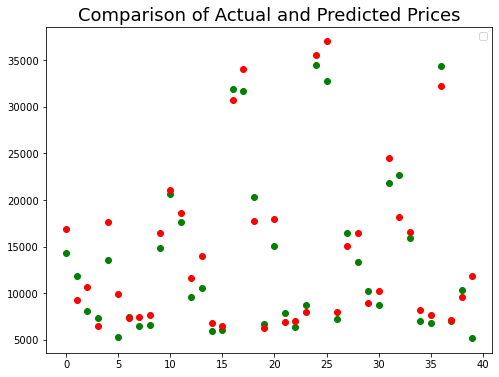

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(price_pred)), price_pred.flatten(), color='green')
plt.scatter(range(len(price_pred)), test_y[0], color='red')
plt.legend()
plt.title("Comparison of Actual and Predicted Prices", fontsize=18)
plt.show()

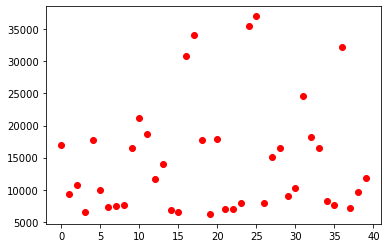

In [69]:
plt.scatter(range(len(price_pred)), test_y[0], color='red')

In [40]:
noc_pred = predictions[1]
noc_pred

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1.

In [41]:
def plot_metrics(metric_name, title):
    plt.title(title)
    #plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    #plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

In [42]:
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

In [43]:
def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

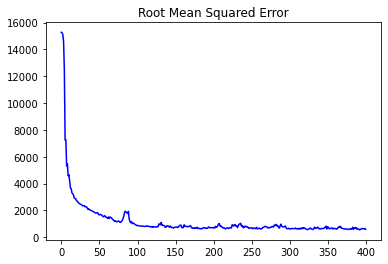

In [44]:
plot_metrics('price_root_mean_squared_error', 'Root Mean Squared Error')

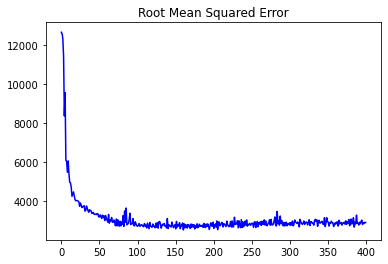

In [45]:
plot_metrics('val_price_root_mean_squared_error', 'Root Mean Squared Error')

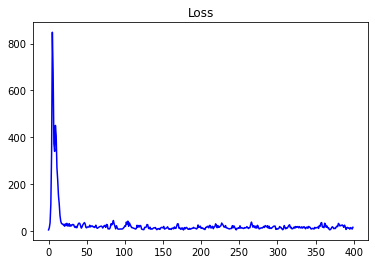

In [46]:
plot_metrics('noc_loss', 'Loss')

In [47]:
def base_model1(inputs):
    x= Dense(500, activation='selu')(inputs)
    x= Dense(500, activation='selu')(x)
    x= Dense(300, activation='selu')(x)
    x= Dense(300, activation='selu')(x)
    x= Dense(300, activation='selu')(x)
    x= Dense(300, activation='selu')(x)
    x= Dense(150, activation='selu')(x)
    x= Dense(150, activation='selu')(x)
    return x

In [49]:
def final_model1(inputs):
    x = base_model1(inputs)
    price = Dense(units='1', name='price')(x)
    
    noc = Dense(units = '5', activation = 'sigmoid', name = 'noc')(x)
    
    model = Model(inputs=inputs, outputs = [price, noc])
    
    return model 

In [51]:
inputs = tf.keras.layers.Input(shape=(27,))
rms = tf.keras.optimizers.RMSprop(lr=0.0003)
model1 = final_model(inputs)

model1.compile(optimizer=rms, 
             loss = {'price': 'mean_squared_error',
                    'noc': 'sparse_categorical_crossentropy'},
             metrics={'price': tf.keras.metrics.RootMeanSquaredError(),
                     'noc': 'accuracy'})

C:\Users\rashi\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [52]:
history1 = model1.fit(train_x, train_y, 
                   epochs=400, validation_data=(val_x, val_y))

Epoch 1/400
4/4 [==============================] - 1s 52ms/step - loss: 233612016.0000 - price_loss: 233612016.0000 - noc_loss: 2.1946 - price_root_mean_squared_error: 15284.3721 - noc_accuracy: 0.2419 - val_loss: 160478272.0000 - val_price_loss: 160478272.0000 - val_noc_loss: 1.2687 - val_price_root_mean_squared_error: 12668.0020 - val_noc_accuracy: 0.6250
Epoch 2/400
4/4 [==============================] - 0s 13ms/step - loss: 232843264.0000 - price_loss: 232843264.0000 - noc_loss: 1.5284 - price_root_mean_squared_error: 15259.2021 - noc_accuracy: 0.5726 - val_loss: 159653328.0000 - val_price_loss: 159653328.0000 - val_noc_loss: 1.9550 - val_price_root_mean_squared_error: 12635.3994 - val_noc_accuracy: 0.5625
Epoch 3/400
4/4 [==============================] - 0s 14ms/step - loss: 231127264.0000 - price_loss: 231127264.0000 - noc_loss: 2.4890 - price_root_mean_squared_error: 15202.8701 - noc_accuracy: 0.5081 - val_loss: 157468176.0000 - val_price_loss: 157468176.0000 - val_noc_loss: 4.

In [53]:
def plot_metrics(metric_name, title):
    plt.title(title)
    #plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    #plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

In [54]:
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

In [55]:
def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

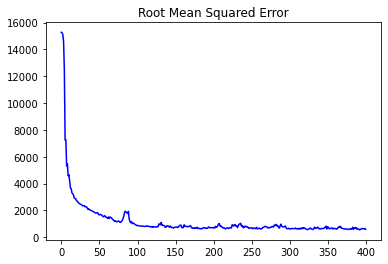

In [56]:
plot_metrics('price_root_mean_squared_error', 'Root Mean Squared Error')